## Nearest Neighbors:

'''
1. These are a set of non-generalizing learning models. They simply store all the training data into a tree structutre
2. It stores the data into fast access data structures like KD Tree or Ball Tree
3. The fundamental principle behind nearest neighbor is to find a predefined number of samples closest in distance to the new point and predict labels/outcomes from these
4. The number of samples are usually user defined or atleast controlled by hyperparameter
5. Very useful algo when dealing with non - linear data

'''

In [1]:
from sklearn.neighbors import NearestNeighbors

##  The Unsupervised Nearest Neighbor Algorithm

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
nn = NearestNeighbors(n_neighbors=7, algorithm='kd_tree')

In [15]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_features=2, n_samples = 500, cluster_std=0.3)

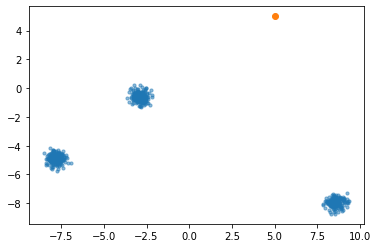

In [16]:
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5)
plt.scatter([5], [5])
plt.show()

In [17]:
nn.fit(X)

NearestNeighbors(algorithm='kd_tree', n_neighbors=7)

In [18]:
nn.kneighbors([[5, 5]])

(array([[8.8852512 , 9.01037624, 9.0355512 , 9.03595726, 9.10760938,
         9.13106625, 9.13854199]]),
 array([[307, 343, 311,  49, 300, 194, 195]], dtype=int64))

In [19]:
_, X_nearest = nn.kneighbors([[5, 5]])
nearest = X[X_nearest[0]]
nearest  # gets the coordinates of the 7 points

array([[-2.24381459, -0.14537065],
       [-2.52102535,  0.03803893],
       [-2.54491559,  0.02853802],
       [-2.20133351, -0.45795926],
       [-2.37002779, -0.35081667],
       [-2.20038137, -0.61523634],
       [-2.59138385, -0.08761642]])

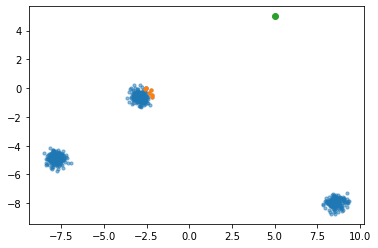

In [20]:
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10, cmap='virdis')
plt.scatter([5], [5])
plt.show()

### Nearest Neighbors for Classification

A query point is assigned to the data class which has the most representative within the nearest neighbors. 

The two types of nearest neighbors are:
1. KNeighborsClassifier (based on configured K)
2. RadiusNeighborsClassifier (based on a configured radius r)

In [21]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [22]:
knc = KNeighborsClassifier(n_neighbors=7)
rnc = RadiusNeighborsClassifier(radius= 5)

In [23]:
X, Y = make_blobs(n_features=2, n_samples = 100, cluster_std=5, centers=2)

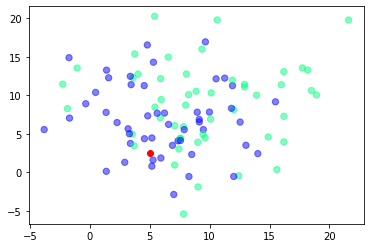

In [25]:
plt.scatter(X[:,0], X[:,1], s=40, alpha=0.5, c=Y, cmap='winter')
plt.scatter([5], [2.5], c='r')
plt.show()

In [26]:
knc.fit(X,Y)

KNeighborsClassifier(n_neighbors=7)

In [27]:
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=5)

In [28]:
knc_pred = knc.predict([[5,2.5]])
knc_pred

array([0])

In [29]:
knc.kneighbors([[5,2.5]])

(array([[0.9403538 , 1.12991559, 1.60485183, 1.70649651, 1.92062186,
         1.97291626, 2.03967151]]),
 array([[32, 60, 93, 23, 33, 59, 42]], dtype=int64))

In [30]:
_, knc_neigbors = knc.kneighbors([[5, 2.5]])
knc_neigbors

array([[32, 60, 93, 23, 33, 59, 42]], dtype=int64)

In [31]:
rnc_pred = rnc.predict([[5,2.5]])
rnc_pred

array([0])

In [32]:
rnc.radius_neighbors([[5, 2.5]])

(array([array([2.86345395, 4.25469971, 4.32789306, 4.80809889, 1.70649651,
               3.02475502, 3.51139687, 0.9403538 , 1.92062186, 3.63037146,
               2.84851388, 2.03967151, 4.42886465, 3.14121919, 4.18888663,
               2.49643541, 4.4683392 , 4.1200559 , 2.40099367, 1.97291626,
               1.12991559, 4.04181995, 2.14930467, 3.2310216 , 3.04257238,
               1.60485183, 2.59057769, 4.67395212, 4.83169131])           ],
       dtype=object),
 array([array([ 0,  3,  9, 11, 23, 29, 31, 32, 33, 34, 40, 42, 43, 44, 45, 48, 49,
               52, 53, 59, 60, 69, 79, 82, 90, 93, 96, 56, 84], dtype=int64)      ],
       dtype=object))

In [33]:
_, rnc_neigbors = rnc.radius_neighbors([[5, 2.5]])
rnc_neigbors

array([array([ 0,  3,  9, 11, 23, 29, 31, 32, 33, 34, 40, 42, 43, 44, 45, 48, 49,
              52, 53, 59, 60, 69, 79, 82, 90, 93, 96, 56, 84], dtype=int64)      ],
      dtype=object)

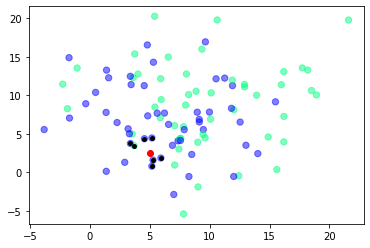

In [34]:
nearest = X[knc_neigbors[0]]
plt.scatter(X[:,0], X[:,1], s=40, alpha=0.5, c=Y, cmap='winter')
plt.scatter([5], [2.5], c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=15, c='k')
plt.show()

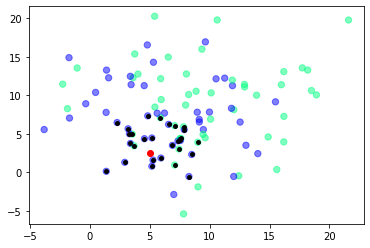

In [35]:
nearest = X[rnc_neigbors[0]]
plt.scatter(X[:,0], X[:,1], s=40, alpha=0.5, c=Y, cmap='winter')
plt.scatter([5], [2.5], c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=15, c='k')
plt.show()

## Determining value of K and radius

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [40]:
acc_score = []
for k in range (1,50):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train, y_train)
    acc = knc.score(x_test, y_test)
    acc_score.append(acc)

In [41]:
import matplotlib.pyplot as plt

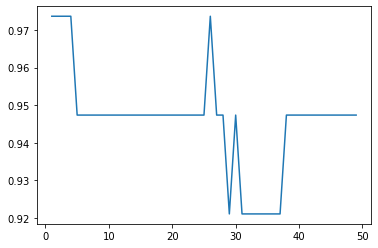

In [42]:
plt.plot(list(range(1,50)), acc_score)
plt.show()

In [47]:
acc_score_radius = []
for k in np.linspace (0.9 ,6, 15):
    rnc = RadiusNeighborsClassifier(radius=k)
    rnc.fit(x_train, y_train)
    acc = rnc.score(x_test, y_test)
    acc_score_radius.append(acc)

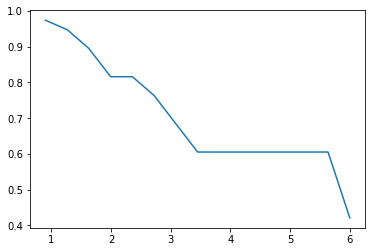

In [48]:
plt.plot(np.linspace (0.9, 6, 15), acc_score_radius)
plt.show()